In [70]:
import dask.dataframe as dd
import dask.array as da

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

In [71]:
df = dd.read_csv("data/data20_q1/data.csv")
# dtype={"Confirmed" : "float64", "Recovered" : "float64", "Deaths" : "float64"}
df.head()

,Country,Date,Confirmed,Recovered,Deaths
0,Germany,2020-01-22,0,0,0
1,Germany,2020-01-23,0,0,0
2,Germany,2020-01-24,0,0,0
3,Germany,2020-01-25,0,0,0
4,Germany,2020-01-26,0,0,0


In [72]:
df.compute().describe()

,Confirmed,Recovered,Deaths
count,6.800000e+03,6.800000e+03,6.800000e+03
mean,9.773762e+06,1.325311e+06,1.469637e+05
std,1.488955e+07,3.718714e+06,1.986277e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.700805e+05,0.000000e+00,2.843975e+04
50%,4.261185e+06,7.056850e+04,8.703750e+04
75%,1.082262e+07,5.615018e+05,1.392890e+05
max,8.323759e+07,3.097475e+07,1.002020e+06


In [73]:
df.compute().corr()

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.074962,0.953456
Recovered,0.074962,1.000000,0.067141
Deaths,0.953456,0.067141,1.000000


In [74]:
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 5 entries, Country to Deaths
dtypes: object(2), int64(3)

In [75]:
df["Date"] = dd.to_datetime(df["Date"])
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 5 entries, Country to Deaths
dtypes: datetime64[ns](1), object(1), int64(3)

In [76]:
df["Active"] = df["Confirmed"] - df["Recovered"] - df["Deaths"]
df.head()

,Country,Date,Confirmed,Recovered,Deaths,Active
0,Germany,2020-01-22,0,0,0,0
1,Germany,2020-01-23,0,0,0,0
2,Germany,2020-01-24,0,0,0,0
3,Germany,2020-01-25,0,0,0,0
4,Germany,2020-01-26,0,0,0,0


In [126]:
mask = (df['Date'] <= "2020-05-20")
df_5months = df.loc[mask]

In [127]:
data_by_date = df_5months.groupby("Date")[["Confirmed", "Recovered", "Deaths", "Active"]].sum()
data_by_date.tail()

,Confirmed,Recovered,Deaths,Active
Date,,,,
2020-05-16,2788725,954901,196352,1637472
2020-05-17,2824949,971935,198135,1654879
2020-05-18,2864072,997356,200003,1666713
2020-05-19,2903257,1017430,201823,1684004
2020-05-20,2943708,1040450,204079,1699179


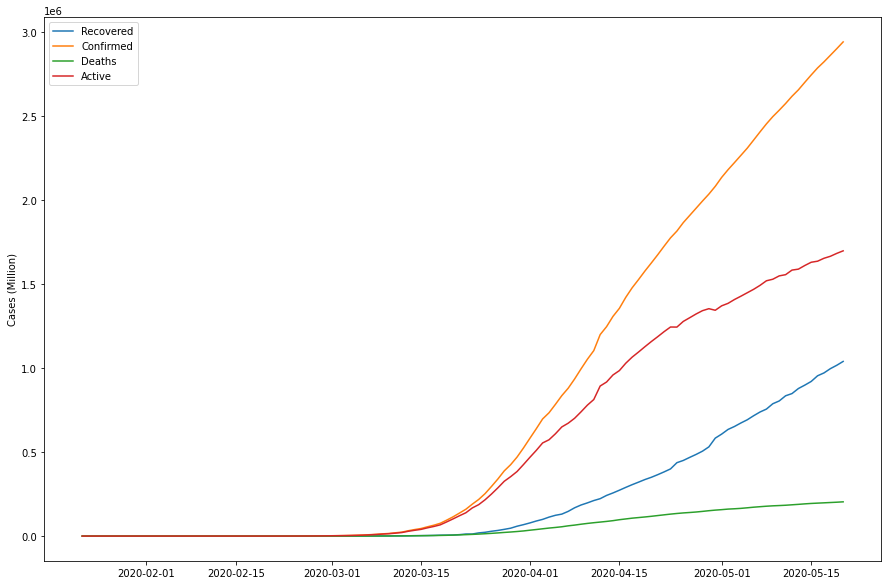

In [128]:
plt.figure(figsize=(15, 10))
plt.plot(data_by_date["Recovered"].compute(), label="Recovered")
plt.plot(data_by_date["Confirmed"].compute(), label="Confirmed")
plt.plot(data_by_date["Deaths"].compute(), label="Deaths")
plt.plot(data_by_date["Active"].compute(), label="Active")
plt.ylabel("Cases (Million)")
plt.legend()

In [129]:
def get_df_by_country(country):
    country_data = df_5months.loc[df_5months["Country"] == country]
    return country_data.groupby(["Date"])[["Confirmed", "Recovered", "Deaths", "Active"]].sum()

In [130]:
data_de_5m = get_df_by_country("Germany")
data_es_5m = get_df_by_country("Spain")
data_fr_5m = get_df_by_country("France")
data_in_5m = get_df_by_country("India")
data_it_5m = get_df_by_country("Italy")
data_ru_5m = get_df_by_country("Russia")
data_tr_5m = get_df_by_country("Turkey")
data_us_5m = get_df_by_country("United States")

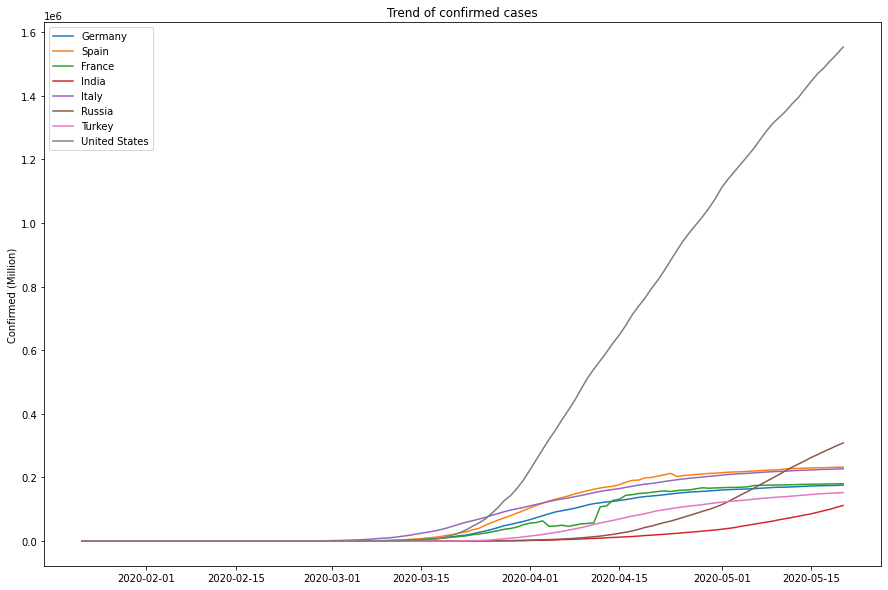

In [131]:
plt.figure(figsize=(15, 10))
plt.plot(data_de_5m["Confirmed"].compute(), label="Germany")
plt.plot(data_es_5m["Confirmed"].compute(), label="Spain")
plt.plot(data_fr_5m["Confirmed"].compute(), label="France")
plt.plot(data_in_5m["Confirmed"].compute(), label="India")
plt.plot(data_it_5m["Confirmed"].compute(), label="Italy")
plt.plot(data_ru_5m["Confirmed"].compute(), label="Russia")
plt.plot(data_tr_5m["Confirmed"].compute(), label="Turkey")
plt.plot(data_us_5m["Confirmed"].compute(), label="United States")
plt.ylabel("Confirmed (Million)")
plt.title("Trend of confirmed cases")
plt.legend()

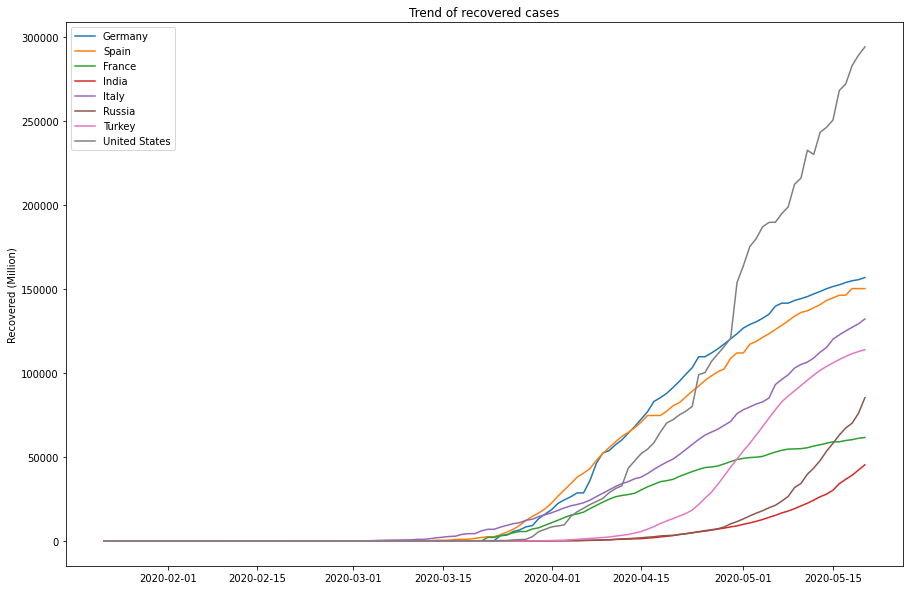

In [132]:
plt.figure(figsize=(15, 10))
plt.plot(data_de_5m["Recovered"].compute(), label="Germany")
plt.plot(data_es_5m["Recovered"].compute(), label="Spain")
plt.plot(data_fr_5m["Recovered"].compute(), label="France")
plt.plot(data_in_5m["Recovered"].compute(), label="India")
plt.plot(data_it_5m["Recovered"].compute(), label="Italy")
plt.plot(data_ru_5m["Recovered"].compute(), label="Russia")
plt.plot(data_tr_5m["Recovered"].compute(), label="Turkey")
plt.plot(data_us_5m["Recovered"].compute(), label="United States")
plt.ylabel("Recovered (Million)")
plt.title("Trend of recovered cases")
plt.legend()

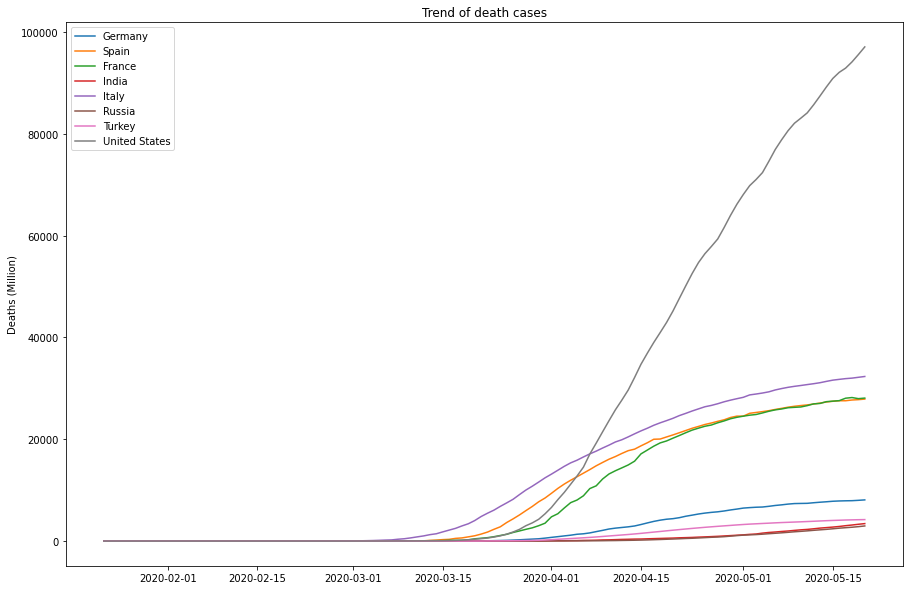

In [133]:
plt.figure(figsize=(15, 10))
plt.plot(data_de_5m["Deaths"].compute(), label="Germany")
plt.plot(data_es_5m["Deaths"].compute(), label="Spain")
plt.plot(data_fr_5m["Deaths"].compute(), label="France")
plt.plot(data_in_5m["Deaths"].compute(), label="India")
plt.plot(data_it_5m["Deaths"].compute(), label="Italy")
plt.plot(data_ru_5m["Deaths"].compute(), label="Russia")
plt.plot(data_tr_5m["Deaths"].compute(), label="Turkey")
plt.plot(data_us_5m["Deaths"].compute(), label="United States")
plt.ylabel("Deaths (Million)")
plt.title("Trend of death cases")
plt.legend()

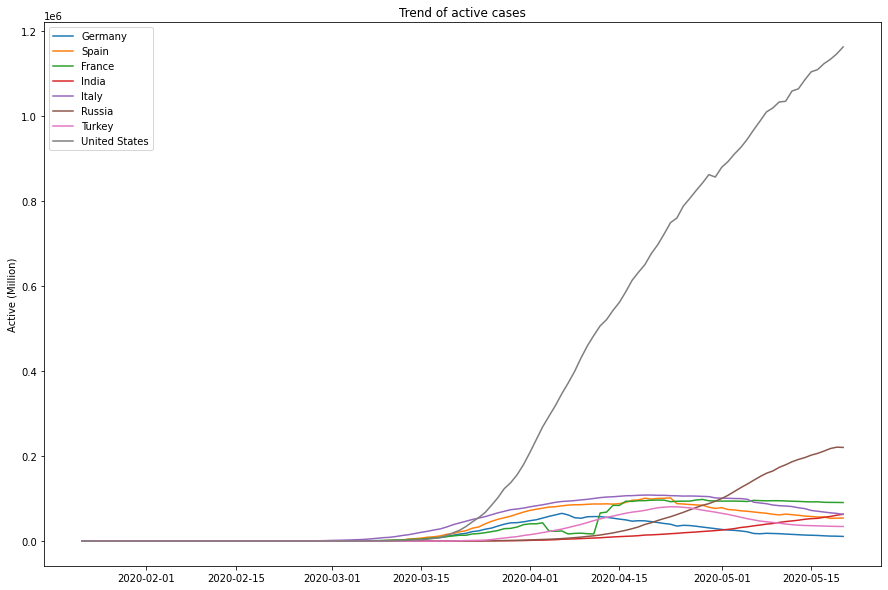

In [134]:
plt.figure(figsize=(15, 10))
plt.plot(data_de_5m["Active"].compute(), label="Germany")
plt.plot(data_es_5m["Active"].compute(), label="Spain")
plt.plot(data_fr_5m["Active"].compute(), label="France")
plt.plot(data_in_5m["Active"].compute(), label="India")
plt.plot(data_it_5m["Active"].compute(), label="Italy")
plt.plot(data_ru_5m["Active"].compute(), label="Russia")
plt.plot(data_tr_5m["Active"].compute(), label="Turkey")
plt.plot(data_us_5m["Active"].compute(), label="United States")
plt.ylabel("Active (Million)")
plt.title("Trend of active cases")
plt.legend()